In [6]:
import numpy as np
import scipy.constants as scc
from matplotlib import pyplot as plt

# Analysis Using a Sine Wave Input

We apply a sine wave across an **RC circuit** and analyze the voltage across the capacitor. By Ohm’s law:

$$ V = IZ $$

For a capacitor, using the charge-voltage relation $Q = CV$, we obtain $I = C \frac{dV}{dt}$. Given an input voltage:

$$ V(t) = V_0 e^{i\omega t + \phi} $$

the current becomes $I = i \omega C V$, leading to the impedance:

$$ Z = \frac{V}{I} = -\frac{i}{\omega C} $$

For a capacitor with dielectric $\kappa$, the capacitance changes to $C = \kappa C_0$, modifying the impedance to:

$$ Z = -\frac{i}{\omega C_0 \kappa} $$

Since $\kappa$ can be a complex response function, the impedance need not be purely imaginary.


In [7]:
D = 3.0*scc.inch # Diameter of capacitor electrode
d = 0.01*scc.inch 
C = np.pi*D**2*scc.epsilon_0/4/d 
print(f'Capacitance C = {C/scc.pico:4.2f} pF')
R = 1e6
omega = 1/C/R
f = omega/2/np.pi
print(f'frequency {f/scc.kilo:7.4f} kHz')

Capacitance C = 158.97 pF
frequency  1.0012 kHz


# **Measurement Parameters**  

To measure the magnitude of the impedance, we can use an **RC circuit** and measure the voltage drop across the capacitor. The magnitude of the impedance in this case is given by:  

$$
V_C = \frac{V_0 \left|Z_C\right|}{\left| Z_C + R \right|}
$$

Our expected capacitance is **$C = 81$ pF**, and we can choose a resistor of approximately **1 MΩ**. To ensure that the resistance is roughly equal to the capacitive reactance, we select a frequency of:  

$$
f = \frac{\omega}{2\pi} = \frac{1}{2\pi RC} \approx 2 \text{ kHz}
$$

Additionally, we may want to explore the **frequency dependence of the dielectric constant**, which would require varying the resistance to optimize our impedance measurements at different frequencies.  

For initial trial measurement, we measured the voltage across the resistor vs. frequency.  This should be given by 
$$
V_R =\left| V_0 \frac{R}{R - i/\omega C}\right| = V_0 R /\sqrt{R^2 + 1/\omega ^2 C^2}
$$ 

We can solve for C via:

$$
C = \frac{1}{\omega R}\sqrt{\frac{V_R^2
}{V_0^2 - V_R^2 }}
$$



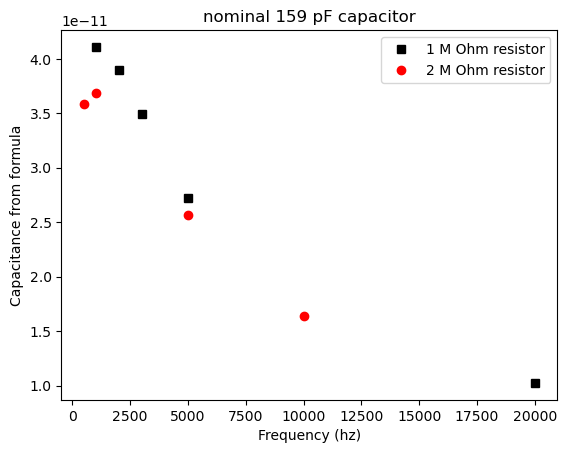

In [8]:
# Data
# (R,f,V)
S1 = np.array([(1e6,1000,0.1),(1e6,20e3,.316),(1e6,5e3,.260),(1e6,2e3,.176),(1e6,3e3,.220),(1e6,4e3,.250),(2e6,10e3,.360),(2e6,5e3,.340),(2e6,1e3,.168),(2e6,500,.088)])
R = S1[:,0]
omega = S1[:,1]*2*np.pi 
V = S1[:,2] 
V_0 = .4
x = omega/2/np.pi
y = (1/omega/R)*np.sqrt(V**2/(V_0**2 -V**2))
plt.plot(x[0:5],y[0:5],'ks',label='1 M Ohm resistor')
plt.plot(x[6:],y[6:],'ro',label = '2 M Ohm resistor')
plt.xlabel('Frequency (hz)')
plt.ylabel('Capacitance from formula')
plt.title('nominal 159 pF capacitor')
plt.legend()


There's probably some inductive reactance of around 100 nH.  Since the inductive reactance is $X_L = \omega L$ we can estimate 

In [9]:
omega_t = 20000*2*np.pi 
L = 100*scc.nano 
XL = omega_t*L 
print(f'XL = {XL:7.4f} Ohm')
C_t= 1e-9
print(f'XC = {1/omega_t/C_t:7.3f} Ohm')

XL =  0.0126 Ohm
XC = 7957.747 Ohm


https://www.dropbox.com/scl/fi/27krcb4n5r36vewliz89w/scope_impedence.png?rlkey=nhaisbzhmdqvaewuhvd2zfr84&raw=1

If we include the scope impedence $R_s$ and capacitance $C_s$ then the voltage drop measured by the scope, is actually the voltage drop accross its internal capacitance.  

Let 

- $X_c = -i/\omega C$ be the reactance of our capacitor.
- $R$ be the load resistance
- $R_s$ the scope impedence
- $X_s = -i/\omega C_s$ the scope reactance

Then the total circuit impedence is 

$$
Z_t = X_c + \frac{1}{\frac{1}{R} + \frac{1}{R_s} + \frac{1}{X_s}}
$$

The voltage across the load resistor and the voltage across the capacitor are out of phase

$$
V_R = \left|  V_0 - \frac{V_0 X_c}{Z_t} \right| 
$$



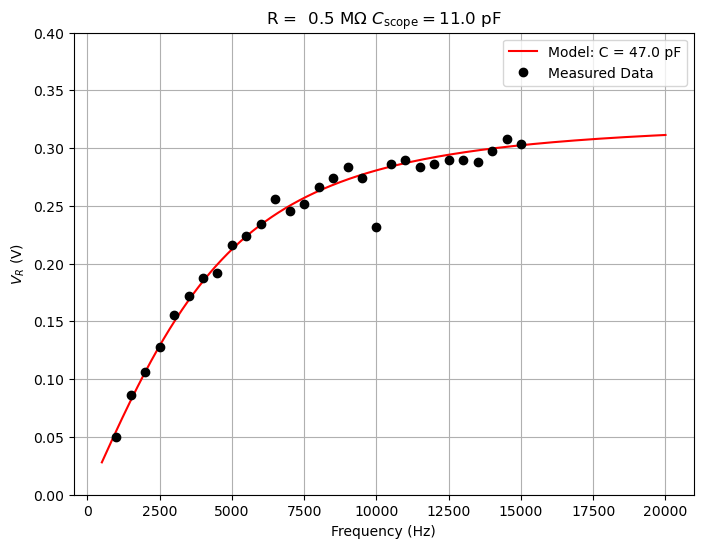

In [39]:
import numpy as np
import scipy.constants as scc
import matplotlib.pyplot as plt

# Input voltage measurements stored as a dictionary
# Keys: Resistance (Ohms), Frequency (Hz), Measured Voltage (V_R)
measurement_data = {
    "resistance": .5e6, # Ohms (Assumed constant for all measurements)
    "frequency": np.array([1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000, 5500, 6000, 6500, 7000, 7500, 8000, 8500, 9000, 9500, 10000, 10500, 11000, 11500, 12000, 12500, 13000, 13500, 14000, 14500, 15000]), 
    "voltage_measured": np.array([0.05, 0.086, 0.106, 0.128, 0.156, 0.172, 0.188, 0.192, 0.216, 0.224, 0.234, 0.256, 0.246, 0.252, 0.266, 0.274,  0.284, 0.274, 0.232, 0.286, 0.29, 0.284, 0.286, 0.29, 0.29, 0.288, 0.298, 0.308, 0.304])
}

# Extract values from the dictionary
R_load = measurement_data["resistance"]  # Load resistance (Ohms)
frequencies = measurement_data["frequency"]  # Frequency data points (Hz)
V_R_measured = measurement_data["voltage_measured"]  # Measured voltage values (V)

# Compute angular frequencies for measured data
omega_measured = frequencies * 2 * np.pi  # Convert Hz to rad/s

# Simulated frequency range
omega_simulated = np.linspace(500, 20000, 1000) * 2 * np.pi  # Rad/s

# Given circuit parameters
V_input = 400 * scc.milli  # Input voltage amplitude (V)
C_main = 47 * scc.pico  # Capacitance of the circuit (F)
C_probe = 11 * scc.pico  # Scope probe capacitance (F)
R_probe = 10 * scc.mega  # Scope probe resistance (Ohms)

# Impedance calculations
X_C_main = -1j / (omega_simulated * C_main)  # Impedance of the main capacitor
X_C_probe = -1j / (omega_simulated * C_probe)  # Impedance of the probe capacitor

# Total impedance calculation
Z_total = X_C_main + 1 / (1 / R_load + 1 / R_probe + 1 / X_C_probe)

# Compute simulated voltage across R_load
V_R_simulated = np.abs(V_input - V_input * X_C_main / Z_total)

# Plotting results
plt.figure(figsize=(8, 6))
plt.plot(omega_simulated / (2 * np.pi), V_R_simulated, '-r', label=f'Model: C = {C_main/scc.pico:4.1f} pF')
plt.plot(frequencies, V_R_measured, 'ko', label='Measured Data')
plt.ylim(0, V_input)
plt.xlabel('Frequency (Hz)')
plt.ylabel('$V_R$ (V)')
plt.title(f'R = {R_load/scc.mega:4.1f} M$\\Omega$ $C_{{\mathrm{{scope}}}} = {C_probe/scc.pico:5.1f}$ pF')
plt.legend()
plt.grid(True)
plt.show()

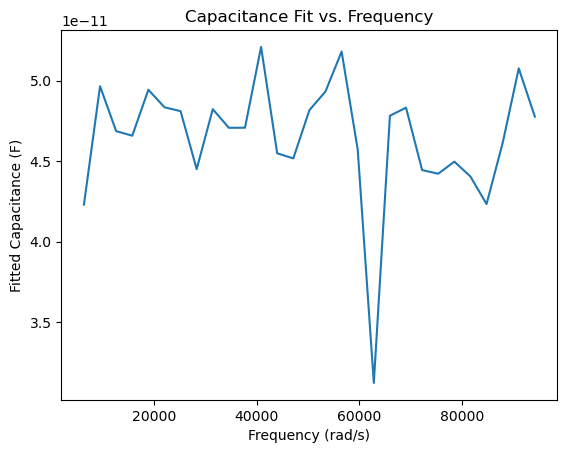

In [36]:
# Sort measurements by frequency
w = np.argsort(omega_measured)
VRM = V_R_measured[w]
om = omega_measured[w]

# Use list comprehension to solve for Cfit
Cfit = np.array([fsolve(vdiff, x0=40*scc.pico, args=(tVR, tom, R_load, R_probe, C_probe))[0] 
                 for tVR, tom in zip(VRM, om)])

# Plot results
plt.plot(om, Cfit)
plt.xlabel("Frequency (rad/s)")
plt.ylabel("Fitted Capacitance (F)")
plt.title("Capacitance Fit vs. Frequency")
plt.show()


In [23]:
a = [1,4,3,5,6]
w = np.argsort(a)
print(w)

[0 2 1 3 4]
